In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "./data/D1/tg_raw.csv"

data = pd.read_csv(DATA_PATH)
data

,SMILES,tg
0,*C*,-54.0
1,*CC(*)C,-3.0
2,*CC(*)CC,-24.1
3,*CC(*)CCC,-37.0
4,*CC(*)C(C)C,60.0
...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0


In [18]:
data["tg"].describe()

count    7174.000000
mean      141.948090
std       112.178143
min      -139.000000
25%        55.000000
50%       134.000000
75%       231.000000
max       495.000000
Name: tg, dtype: float64

In [19]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    7174.000000
mean       63.467103
std        35.174694
min         3.000000
25%        35.000000
50%        59.000000
75%        85.000000
max       314.000000
Name: SMILES, dtype: float64

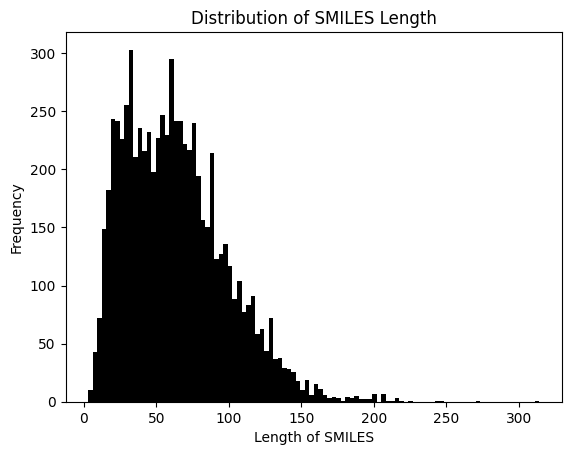

In [20]:
smiles_length = data["SMILES"].apply(lambda x: len(x))
smiles_length.hist(bins=100, color="#000")
plt.xlabel("Length of SMILES")
plt.ylabel("Frequency")
plt.title("Distribution of SMILES Length")
plt.grid(alpha=0)
plt.show()

In [21]:
data["SMILES"]

0                                                 *C*
1                                             *CC(*)C
2                                            *CC(*)CC
3                                           *CC(*)CCC
4                                         *CC(*)C(C)C
                            ...                      
7169                               *CC(*)(F)C(=O)OCCC
7170          *CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F
7171    *CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*
7172     *CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*
7173                      *CC(*)(F)C(=O)OCC(Cl)(Cl)Cl
Name: SMILES, Length: 7174, dtype: object

In [22]:
from collections import Counter


unique_chars = set()
for smiles in data["SMILES"]:
    unique_chars.update(set(smiles))

unique_chars = sorted(list(unique_chars))
print(f"There are {len(unique_chars)} unique characters in SMILES")


all_chars = "".join(data["SMILES"].dropna())
char_counts = Counter(all_chars)

# Convert to DataFrame for better visualization
char_counts_df = pd.DataFrame(char_counts.items(), columns=["Character", "Count"])
char_counts_df = char_counts_df.sort_values(by="Count", ascending=True)
char_counts_df.head()

There are 47 unique characters in SMILES


,Character,Count
46,K,1
41,L,1
45,T,1
42,d,2
44,Z,2


In [23]:
import numpy as np

# Extract unique characters
unique_chars = sorted(set("".join(data["SMILES"].astype(str))))
char_to_index = {char: i for i, char in enumerate(unique_chars)}

# Define max length for padding
max_length = 200

# Function to convert SMILES to One-Hot Encoding
def smiles_to_ohe(smiles, char_to_index, max_length):
    ohe_matrix = np.zeros((max_length, len(char_to_index)), dtype=int)
    for i, char in enumerate(smiles[:max_length]):  # Truncate if longer than max_length
        if char in char_to_index:
            ohe_matrix[i, char_to_index[char]] = 1
    return ohe_matrix.flatten()  # Flatten to create a single-row feature vector


# Apply the transformation
data["OHE_Features"] = data["SMILES"].apply(
    lambda x: smiles_to_ohe(x, char_to_index, max_length).tolist()
)

# Convert into a DataFrame with separate columns
ohe_df = pd.DataFrame(
    data["OHE_Features"].to_list(),
    columns=[f"Char_{i}" for i in range(max_length * len(unique_chars))],
)

In [24]:
ohe_df

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
processed_data = pd.concat([data, ohe_df], axis=1)
processed_data

,SMILES,tg,OHE_Features,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,*C*,-54.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,*CC(*)C,-3.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,*CC(*)CC,-24.1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,*CC(*)CCC,-37.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,*CC(*)C(C)C,60.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
processed_data = processed_data.dropna(subset=["tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,SMILES,tg,OHE_Features,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,*C*,-54.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,*CC(*)C,-3.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,*CC(*)CC,-24.1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,*CC(*)CCC,-37.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,*CC(*)C(C)C,60.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X = processed_data.drop(columns=["SMILES", "tg", "OHE_Features"])
X

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = processed_data["tg"]
y

0       -54.0
1        -3.0
2       -24.1
3       -37.0
4        60.0
        ...  
7169     62.0
7170    152.0
7171     98.0
7172    118.0
7173    127.0
Name: tg, Length: 7174, dtype: float64

In [34]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBoost Regressor
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}

# Randomized Search
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    cv=10,
    scoring="r2",
    n_jobs=6,
    verbose=1,
    n_iter=5,  # Change to a higher value for a better search
    random_state=42,
)

# Fit the model
random_search.fit(X, y)

# Get best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best R^2 Score: 0.5557


In [29]:
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=24
# )

In [30]:
# from xgboost import XGBRegressor

# model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

In [31]:
# from sklearn.metrics import mean_squared_error, r2_score


# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# print(f"R2 Score: {r2}")
# print(f"Mean Squared Error: {mse}")


# plt.scatter(y_test, y_pred, color="black")
# plt.xlabel("True Tg")
# plt.ylabel("Predicted Tg")
# plt.title("True vs Predicted Tg")

# # regression line
# z = np.polyfit(y_test, y_pred, 1)
# p = np.poly1d(z)
# plt.plot(y_test, p(y_test), color="red")

# plt.text(5, 200, f"R2 Score: {r2:.2f}", fontsize=12)
# plt.text(5, 180, f"Mean Squared Error: {mse:.2f}", fontsize=12)
# plt.grid(alpha=0)
# plt.tight_layout()
# plt.show()

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

rf = RandomForestRegressor()

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    cv=10,
    scoring="r2",
    n_jobs=4,
    verbose=1,
    n_iter=1,
)

random_search.fit(X, y)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best R^2 Score: 0.4355


In [ ]:
cv_scores = cross_val_score(
    random_search.best_estimator_,
    X,
    y,
    cv=10,
    scoring="r2",
    n_jobs=-2,
)
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
print(cv_results_df)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Generating a random dataset for demonstration
np.random.seed(24)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [2:30:19<00:49, 49.04s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5319
[LightGBM] [Info] Number of data points in the train set: 5739, number of used features: 1773
[LightGBM] [Info] Start training from score 142.200306


100%|██████████| 42/42 [2:30:24<00:00, 214.87s/it]


In [15]:
models.sort_values(by="R-Squared", ascending=False).head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.04,0.79,51.38,160.65
LGBMRegressor,1.04,0.78,52.60,5.11
HistGradientBoostingRegressor,1.04,0.78,52.60,58.74
XGBRegressor,1.04,0.77,52.89,9.24
BaggingRegressor,1.04,0.76,54.09,26.73
LassoCV,1.05,0.74,56.49,968.92
ElasticNetCV,1.05,0.74,56.75,568.50
BayesianRidge,1.05,0.73,57.80,210.63
ElasticNet,1.05,0.73,57.81,7.54
